# Install Requirments and import libraries

In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=bfa88ea7cc061547da4eac7c82892512d9fef8c454db13588b25bfcec3e66506
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
from PIL import Image
import face_recognition
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K
import matplotlib. pyplot as plt
from sklearn.metrics import confusion_matrix

# Images Preprocessing

Upload the Images Folder as zipped folder containing for example:

>Images
>>Train
>>>donald_trump
>>>>donald_1.jpg

>>>>donald_2.jpg...

>>>marcel_ghanem
>>>>marcel_1.jpg

>>>>marcel_2.jpg...

>>Test
>>>donald_trump
>>>>donald_1.jpg

>>>>donald_2.jpg...

>>>marcel_ghanem
>>>>marcel_1.jpg

>>>>marcel_2.jpg...

each person folder in Train folder should contain at least 10 images
each in Test should contain at least 2 images
and each image should be name as its folder intial name and its index example: for folder donald_trump contains files as trump_1.jpg, trump_2.jpg ...

Note: you can convert all your images to jpg using single bash command from imagemagick:
>mogrify -format jpg \*.*



In [0]:
!unzip -q Images.zip

## Cropping the faces from images to get better predictions by using face_recognition face_locations from https://github.com/ageitgey/face_recognition

### Create Cropped_Images directory containing the same people, test and train sets

In [0]:
sets = os.listdir('Images')
os.mkdir("Cropped_Images")
for set_i in sets:
  os.mkdir(os.path.join("Cropped_Images", set_i))
  people = os.listdir(os.path.join('Images',set_i))
  for person in people:
    os.mkdir(os.path.join(os.path.join("Cropped_Images",set_i),person))

### Crop faces to Crop_Images using face_recognition

In [0]:
sets = os.listdir('Images')
sets.remove('Mixed_Pics')
more_or_no_images_per_picture=[]
for set_i in sets:
  print("############### {} ###############".format(set_i))
  set_dir = os.path.join("Images",set_i)
  save_set_dir = os.path.join("Cropped_Images",set_i)
  people = os.listdir(set_dir)
  for person in people:
    print("\n\n________________________________________________________________")
    print(person)
    print("________________________________________________________________\n")
    filedir = os.path.join(set_dir,person)
    savedir = os.path.join(save_set_dir,person)
    length =2
    if set_i == 'Train':
      length = 10
    for i in range(1,length+1):
      image_location = os.path.join(filedir,person.split("_")[0] + "_" +str(i)+".jpg")
      image = face_recognition.load_image_file(image_location)
      face_locations = face_recognition.face_locations(image)
      print("\t" + person.split("_")[0] + "_" +str(i)+".jpg" + ":  Founded {} faces".format(len(face_locations)))
      if len(face_locations) != 1:
        more_or_no_images_per_picture.append(person.split("_")[0] + "_" +str(i)+".jpg")
      for face_location in face_locations:
        top, right, bottom, left = face_location
        face_image = image[top:bottom, left:right]
        plt_image = Image.fromarray(face_image)
        plt_image.save( os.path.join(savedir,person.split("_")[0] + "_" +str(i)+".jpg"))
print("LIST OF IMAGES OF MORE identified FACES")
print(more_or_no_images_per_picture)

############### Train ###############


________________________________________________________________
anthony_fauci
________________________________________________________________

	anthony_1.jpg:  Founded 1 faces
	anthony_2.jpg:  Founded 1 faces
	anthony_3.jpg:  Founded 1 faces
	anthony_4.jpg:  Founded 1 faces
	anthony_5.jpg:  Founded 1 faces
	anthony_6.jpg:  Founded 1 faces
	anthony_7.jpg:  Founded 1 faces
	anthony_8.jpg:  Founded 1 faces
	anthony_9.jpg:  Founded 1 faces
	anthony_10.jpg:  Founded 1 faces


________________________________________________________________
marcel_ghanem
________________________________________________________________

	marcel_1.jpg:  Founded 1 faces
	marcel_2.jpg:  Founded 1 faces
	marcel_3.jpg:  Founded 1 faces
	marcel_4.jpg:  Founded 1 faces
	marcel_5.jpg:  Founded 1 faces
	marcel_6.jpg:  Founded 1 faces
	marcel_7.jpg:  Founded 1 faces
	marcel_8.jpg:  Founded 1 faces
	marcel_9.jpg:  Founded 1 faces
	marcel_10.jpg:  Founded 1 faces


______________

Save Cropped Directory as zipped inorder to be downloaded from colab

In [0]:
https://drive.google.com/open?id=1MG2uv0aDeKIa1E9xLxDuDd20xz1DmxEi

## Weights at [link](https://github.com/serengil/tensorflow-101/blob/master/python/deep-face-real-time.py)

Download VGG weights using the method from
https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--6gu0ibBqnTTY98Y8TJ18ng_pxbY0zD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1--6gu0ibBqnTTY98Y8TJ18ng_pxbY0zD" -O resultttts && rm -rf /tmp/cookies.txt

--2020-04-22 20:01:55--  https://docs.google.com/uc?export=download&confirm=q6rA&id=1--6gu0ibBqnTTY98Y8TJ18ng_pxbY0zD
Resolving docs.google.com (docs.google.com)... 74.125.124.102, 74.125.124.113, 74.125.124.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-94-docs.googleusercontent.com/docs/securesc/ijv19k7onoh49cofuv9v422ql45vrefr/lf0mrels848juabdruhjku6hrls7beil/1587585675000/09317107062899858606/06498382268679447746Z/1--6gu0ibBqnTTY98Y8TJ18ng_pxbY0zD?e=download [following]
--2020-04-22 20:01:55--  https://doc-00-94-docs.googleusercontent.com/docs/securesc/ijv19k7onoh49cofuv9v422ql45vrefr/lf0mrels848juabdruhjku6hrls7beil/1587585675000/09317107062899858606/06498382268679447746Z/1--6gu0ibBqnTTY98Y8TJ18ng_pxbY0zD?e=download
Resolving doc-00-94-docs.googleusercontent.com (doc-00-94-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connectin

In [0]:
!unzip resultttts -d tr

Archive:  resultttts
   creating: tr/temp/
   creating: tr/temp/results/
   creating: tr/temp/results/Results_NS5/
  inflating: tr/temp/results/Results_NS5/chb15_10_1_1_56.mat  
  inflating: tr/temp/results/Results_NS5/chb15_06_3_1_54.mat  
  inflating: tr/temp/results/Results_NS5/chb15_40_1_1_84.mat  
  inflating: tr/temp/results/Results_NS5/chb14_04_4_1_27.mat  
  inflating: tr/temp/results/Results_NS5/chb14_11_2_1_29.mat  
  inflating: tr/temp/results/Results_NS5/chb15_46_1_1_88.mat  
  inflating: tr/temp/results/Results_NS5/chb15_06_4_1_55.mat  
  inflating: tr/temp/results/Results_NS5/chb14_03_2_1_21.mat  
  inflating: tr/temp/results/Results_NS5/chb14_18_1_1_36.mat  
  inflating: tr/temp/results/Results_NS5/chb15_17_4_1_67.mat  
  inflating: tr/temp/results/Results_NS5/chb14_17_4_1_35.mat  
  inflating: tr/temp/results/Results_NS5/chb15_02_1_1_48.mat  
  inflating: tr/temp/results/Results_NS5/chb15_02_4_1_51.mat  
  inflating: tr/temp/results/Results_NS5/chb15_10_3_1_58.mat  
  i

In [0]:
!zip -r results.zip temp

  adding: temp/ (stored 0%)
  adding: temp/results/ (stored 0%)
  adding: temp/results/Results_NS5/ (stored 0%)
  adding: temp/results/Results_NS5/chb15_10_1_1_56.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb15_06_3_1_54.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb15_40_1_1_84.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb14_04_4_1_27.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb14_11_2_1_29.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb15_46_1_1_88.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb15_06_4_1_55.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb14_03_2_1_21.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb14_18_1_1_36.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb15_17_4_1_67.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb14_17_4_1_35.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb15_02_1_1_48.mat (deflated 0%)
  adding: temp/results/Results_NS5/chb15_02_4_1_51.mat (defl

In [0]:
!dir results/

In [0]:
import os
os.stat('temp').st_size

4096

In [0]:
!zip 

In [0]:
!unrar x results

In [0]:
!unzip NS3

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Create the VGG model for and load the weights

In [0]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))	
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))
model.load_weights('drive/My Drive/Weights/vgg_face_weights.h5')

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_39 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_40 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_41 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 112, 112, 128)    

## Remove the layer after Flatening from out VGG

In [0]:
face_embedding=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output) 

# Train/Test Data

## Train

In [0]:
train_dir = os.path.join("Cropped_Images","Train")
people=os.listdir(train_dir)
names_dic = {}
x_train=[]
y_train=[]
for index_p,person in enumerate(people):
  filedir = os.path.join(train_dir,person)
  names_dic[index_p] = person
  for i in range(1,11):
    image_location = os.path.join(filedir,person.split("_")[0] + "_" +str(i)+".jpg")
    image_p=load_img(image_location,target_size=(224,224))
    image_p=img_to_array(image_p)
    image_p=np.expand_dims(image_p,axis=0)
    image_p=preprocess_input(image_p)
    image_p_vgg=face_embedding(image_p)
    x_train.append(np.squeeze(K.eval(image_p_vgg)).tolist())
    y_train.append(index_p)

## Test

In [0]:
test_dir = os.path.join("Cropped_Images","Test")
people=os.listdir(test_dir)
names_dic = {}
x_test=[]
y_test=[]
for index_p,person in enumerate(people):
  filedir = os.path.join(test_dir,person)
  names_dic[index_p] = person
  for i in range(1,3):
    image_location = os.path.join(filedir,person.split("_")[0] + "_" +str(i)+".jpg")
    image_p=load_img(image_location,target_size=(224,224))
    image_p=img_to_array(image_p)
    image_p=np.expand_dims(image_p,axis=0)
    image_p=preprocess_input(image_p)
    image_p_vgg=face_embedding(image_p)
    x_test.append(np.squeeze(K.eval(image_p_vgg)).tolist())
    y_test.append(index_p)

In [0]:
y_test

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]

In [0]:
x_train=np.array(x_train) 
y_train=np.array(y_train)
x_test=np.array(x_test) 
y_test=np.array(y_test)

In [0]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10])

# Design Our Classifier

[Glorot_uniform](https://keras.io/initializers/) draws samples from a uniform distribution within [-limit, limit] where limit is sqrt(6 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.

In [0]:
face_detection_model=Sequential()	
face_detection_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))	
face_detection_model.add(Activation('tanh'))
face_detection_model.add(Dropout(0.3))
face_detection_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
face_detection_model.add(Activation('tanh'))
face_detection_model.add(Dropout(0.3))
face_detection_model.add(Dense(units=11,kernel_initializer='glorot_uniform'))
face_detection_model.add(Activation('softmax'))
face_detection_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [0]:
history=face_detection_model.fit(x_tr,y_tr, epochs = 30, validation_data=(x_val,y_val))

Epoch 1/30
3/3 [==============================] - 0s 38ms/step - loss: 2.6334 - accuracy: 0.0909 - val_loss: 2.1021 - val_accuracy: 0.1364
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 2.1004 - accuracy: 0.2955 - val_loss: 1.8513 - val_accuracy: 0.3636
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 1.8350 - accuracy: 0.3295 - val_loss: 1.5155 - val_accuracy: 0.5909
Epoch 4/30
3/3 [==============================] - 0s 11ms/step - loss: 1.7050 - accuracy: 0.4205 - val_loss: 1.4294 - val_accuracy: 0.6364
Epoch 5/30
3/3 [==============================] - 0s 11ms/step - loss: 1.4519 - accuracy: 0.5682 - val_loss: 1.2157 - val_accuracy: 0.7273
Epoch 6/30
3/3 [==============================] - 0s 11ms/step - loss: 1.3462 - accuracy: 0.6250 - val_loss: 1.2762 - val_accuracy: 0.7273
Epoch 7/30
3/3 [==============================] - 0s 11ms/step - loss: 1.2896 - accuracy: 0.6705 - val_loss: 1.0650 - val_accuracy: 0.8182
Epoch 8/30
3/3 [===========

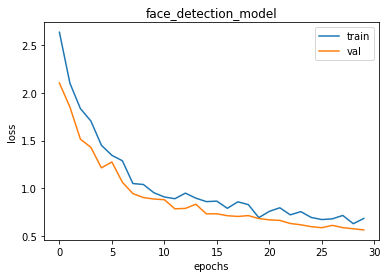

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('face_detection_model')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'])
plt.show()

In [0]:
face_detection_model.save_weights('face_detection_model_weights.h5')

In [0]:
face_detection_model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_53", "layers": [{"class_name": "Dense", "config": {"name": "dense_138", "trainable": true, "batch_input_shape": [null, 2622], "dtype": "float32", "units": 100, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_72", "trainable": true, "dtype": "float32", "axis": [1], "momentum": 0.99, "epsilon": 0.001, "center": true, "scale": true, "beta_initializer": {"class_name": "Zeros", "config": {}}, "gamma_initializer": {"class_name": "Ones", "config": {}}, "moving_mean_initializer": {"class_name": "Zeros", "config": {}}, "moving_variance_initializer": {"class_name": "Ones", "config": {}}, "beta

# Demonstration of resulting model on some images

In [0]:
import cv2

In [0]:
def rect_face(pathh=None):
  image = face_recognition.load_image_file(pathh)
  face_locations = face_recognition.face_locations(image)
  return face_locations

In [0]:
  names_dic = {0: 'anthony_fauci',
  1: 'marcel_ghanem',
  2: 'donald_trump',
  3: 'hamad_hassan',
  4: 'andrew_cuomo',
  5: 'Moe_Mansour',
  6: 'fadlo_khoury',
  7: 'bill_gates',
  8: 'angela_merkel',
  9: 'yann_lecun',
  10: 'tedros_adhanom'}

In [0]:
people =['anthony_fauci',
 'marcel_ghanem',
 'donald_trump',
 'hamad_hassan',
 'andrew_cuomo',
 'Moe_Mansour',
 'fadlo_khoury',
 'bill_gates',
 'angela_merkel',
 'yann_lecun',
 'tedros_adhanom']

In [0]:
def find_me(im_path_file):
  names_dic = {0: 'anthony_fauci',
  1: 'marcel_ghanem',
  2: 'donald_trump',
  3: 'hamad_hassan',
  4: 'andrew_cuomo',
  5: 'Moe_Mansour',
  6: 'fadlo_khoury',
  7: 'bill_gates',
  8: 'angela_merkel',
  9: 'yann_lecun',
  10: 'tedros_adhanom'}
  
  pred_im = im_path_file
  img=cv2.imread(pred_im)
  if img is None or img.size is 0 :
    print("Please check image path or some error occured")

  else:
    ppl_in_image=[]
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects=rect_face(pred_im)
    l2r={}
    left,top,right,bottom=0,0,0,0
    for face_location in rects:
      top, right, bottom, left = face_location
      face_image = img[top:bottom, left:right]
      plt_image = Image.fromarray(face_image)
      plt_image.save("aa.jpg")
      # Get Embeddings
      crop_img=load_img("aa.jpg",target_size=(224,224))
      crop_img=img_to_array(crop_img)
      crop_img=np.expand_dims(crop_img,axis=0)
      crop_img=preprocess_input(crop_img)
      img_encode=face_embedding(crop_img)
      # Predict
      embed=K.eval(img_encode)
      person=face_detection_model.predict(embed)
      name=names_dic[np.argmax(person)]
      l2r[name]=left
      os.remove(os.getcwd()+'/aa.jpg')
      cv2.rectangle(img,(left,top),(right,bottom),(255,0,0), 2)
      img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
      img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),1,cv2.LINE_AA)
      ppl_in_image.append(name)
      
    cv2.imwrite(os.getcwd()+'/output_image.jpg',img)
    if len(list(l2r.keys())) >1: 
      left_to_right={k: v for k, v in sorted(l2r.items(), key=lambda item: item[1])} 
      print('People in the image starting from the Left to Right are as follows: {}'.format(', '.join(list(l2r.keys()))))
    else:
      print('The person recognized is : {}'.format(list(l2r.keys())))
    plt.figure(figsize=(16,8))
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

People in the image starting from the Left to Right are as follows: donald_trump, angela_merkel


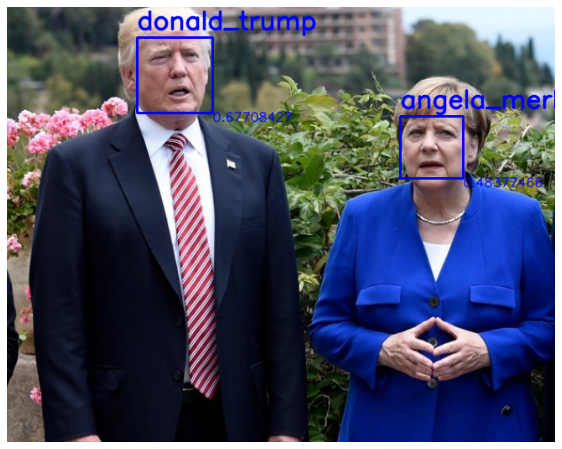

In [0]:
find_me('Images/Mixed_Pics/merekel-trump2.jpg')

# Results On Test Set and confusion matrix

Using the code present in kaggle https://www.kaggle.com/grfiv4/plot-a-confusion-matrix for confusion matrix in keras

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [0]:
names_dic = {0: 'tedros_adhanom',
  1: 'bill_gates',
  2: 'andrew_cuomo',
  3: 'yann_lecun',
  4: 'fadlo_khoury',
  5: 'donald_trump',
  6: 'hamad_hassan',
  7: 'anthony_fauci',
  8: 'angela_merkel',
  9: 'marcel_ghanem',
  10: 'Moe_Mansour'}

## Train

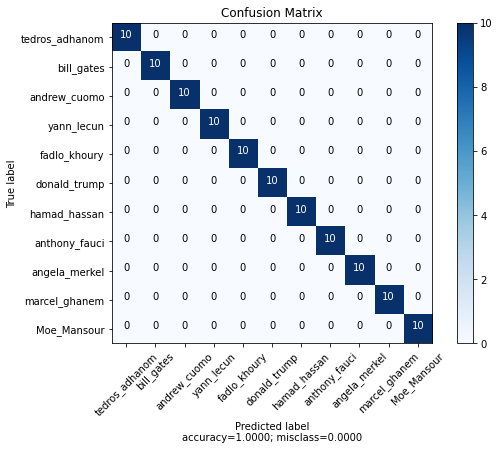

In [0]:
y_train_pred=[]
train_prob = face_detection_model.predict(x_train)
for i in train_prob:
  y_train_pred.append(np.argmax(i))
cf_matrix_train=confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm           =  cf_matrix_train,
                      normalize    = False,
                      target_names = list(names_dic.values()),
                      title        = "Confusion Matrix")

## Test

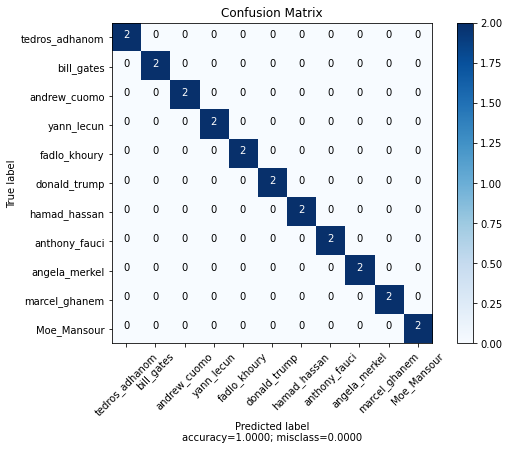

In [0]:
y_test_pred=[]
test_prob = face_detection_model.predict(x_test)
for i in test_prob:
  y_test_pred.append(np.argmax(i))
cf_matrix_test=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm           =  cf_matrix_test,
                      normalize    = False,
                      target_names = list(names_dic.values()),
                      title        = "Confusion Matrix")